In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "부산진구"
region_code = "8"
target_date = "2023-01-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("부산진구2023_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-01-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,부산진구,7425,부산진구,0,0.0%,"7,425"
1,2023-01-12,간장,오복왕표 0.9ℓ 1병,5800,부산진구,5800,부산진구,0,0.0%,"5,800"
2,2023-01-12,갈치,60cm정도 500g 1마리(냉동),12450,부산진구,12450,부산진구,0,0.0%,"12,450"
3,2023-01-12,고등어,30㎝정도 500g 1마리,6225,부산진구,6225,부산진구,0,0.0%,"6,225"
4,2023-01-12,달걀,오경슈퍼란60g정도 10개,4590,부산진구,4590,부산진구,0,0.0%,"4,590"
5,2023-01-12,닭고기,육계 1.0㎏,9480,부산진구,9480,부산진구,0,0.0%,"9,480"
6,2023-01-12,대파,1.0㎏,3612,부산진구,3612,부산진구,0,0.0%,"3,612"
7,2023-01-12,돼지고기,삼겹살 500g,18900,부산진구,18900,부산진구,0,0.0%,"18,900"
8,2023-01-12,두부,500g 판두부(국산포장두부 420g) 1모,5194,부산진구,5194,부산진구,0,0.0%,"5,194"
9,2023-01-12,라면,신라면 120g 1봉지,820,부산진구,820,부산진구,0,0.0%,820


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "부산진구"
region_code = "8"
target_date = "2023-04-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("부산진구2023_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-04-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8625,부산진구,8625,부산진구,0,0.0%,"8,625"
1,2023-04-13,간장,오복왕표 0.9ℓ 1병,5800,부산진구,5800,부산진구,0,0.0%,"5,800"
2,2023-04-13,갈치,60cm정도 500g 1마리(냉동),11000,부산진구,11000,부산진구,0,0.0%,"11,000"
3,2023-04-13,고등어,30㎝정도 500g 1마리,5612,부산진구,5612,부산진구,0,0.0%,"5,612"
4,2023-04-13,달걀,오경슈퍼란60g정도 10개,3990,부산진구,3990,부산진구,0,0.0%,"3,990"
5,2023-04-13,닭고기,육계 1.0㎏,6612,부산진구,6612,부산진구,0,0.0%,"6,612"
6,2023-04-13,대파,1.0㎏,2790,부산진구,2790,부산진구,0,0.0%,"2,790"
7,2023-04-13,돼지고기,삼겹살 500g,19450,부산진구,19450,부산진구,0,0.0%,"19,450"
8,2023-04-13,두부,500g 판두부(국산포장두부 420g) 1모,5194,부산진구,5194,부산진구,0,0.0%,"5,194"
9,2023-04-13,라면,신라면 120g 1봉지,820,부산진구,820,부산진구,0,0.0%,820


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "부산진구"
region_code = "8"
target_date = "2023-07-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("부산진구2023_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-07-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,부산진구,7425,부산진구,0,0.0%,"7,425"
1,2023-07-13,간장,오복왕표 0.9ℓ 1병,5800,부산진구,5800,부산진구,0,0.0%,"5,800"
2,2023-07-13,갈치,60cm정도 500g 1마리(냉동),9900,부산진구,9900,부산진구,0,0.0%,"9,900"
3,2023-07-13,고등어,30㎝정도 500g 1마리,4428,부산진구,4428,부산진구,0,0.0%,"4,428"
4,2023-07-13,달걀,오경슈퍼란60g정도 10개,3990,부산진구,3990,부산진구,0,0.0%,"3,990"
5,2023-07-13,닭고기,육계 1.0㎏,9991,부산진구,9991,부산진구,0,0.0%,"9,991"
6,2023-07-13,대파,1.0㎏,4112,부산진구,4112,부산진구,0,0.0%,"4,112"
7,2023-07-13,돼지고기,삼겹살 500g,20950,부산진구,20950,부산진구,0,0.0%,"20,950"
8,2023-07-13,두부,500g 판두부(국산포장두부 420g) 1모,5194,부산진구,5194,부산진구,0,0.0%,"5,194"
9,2023-07-13,라면,신라면 120g 1봉지,780,부산진구,780,부산진구,0,0.0%,780


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "부산진구"
region_code = "8"
target_date = "2023-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("부산진구2023_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,부산진구,7425,부산진구,0,0.0%,"7,425"
1,2023-10-12,간장,오복왕표 0.9ℓ 1병,5800,부산진구,5800,부산진구,0,0.0%,"5,800"
2,2023-10-12,갈치,60cm정도 500g 1마리(냉동),12000,부산진구,12000,부산진구,0,0.0%,"12,000"
3,2023-10-12,고등어,30㎝정도 500g 1마리,4987,부산진구,4987,부산진구,0,0.0%,"4,987"
4,2023-10-12,달걀,오경슈퍼란60g정도 10개,3990,부산진구,3990,부산진구,0,0.0%,"3,990"
5,2023-10-12,닭고기,육계 1.0㎏,9158,부산진구,9158,부산진구,0,0.0%,"9,158"
6,2023-10-12,대파,1.0㎏,4487,부산진구,4487,부산진구,0,0.0%,"4,487"
7,2023-10-12,돼지고기,삼겹살 500g,21450,부산진구,21450,부산진구,0,0.0%,"21,450"
8,2023-10-12,두부,500g 판두부(국산포장두부 420g) 1모,5670,부산진구,5670,부산진구,0,0.0%,"5,670"
9,2023-10-12,라면,신라면 120g 1봉지,780,부산진구,780,부산진구,0,0.0%,780


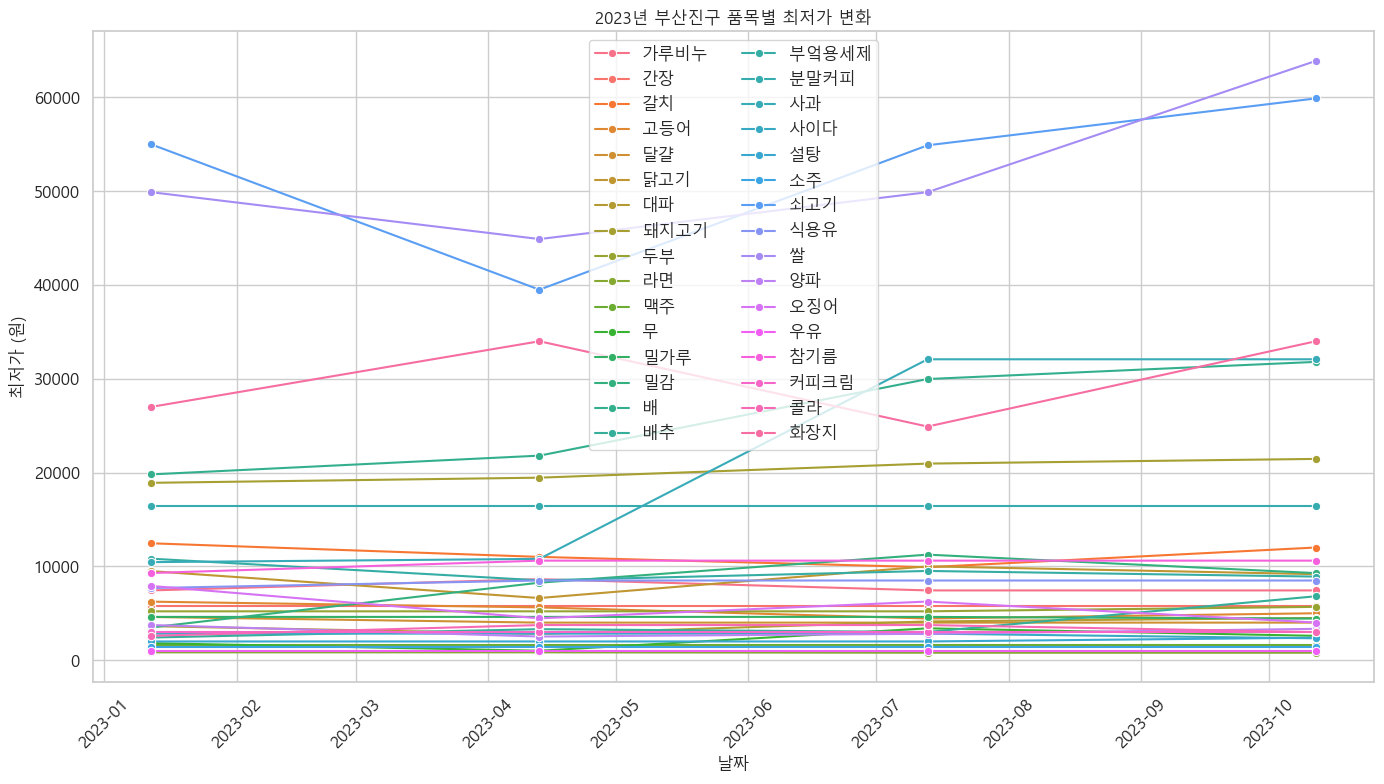

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("부산진구2023_1q.csv")
q2 = pd.read_csv("부산진구2023_2q.csv")
q3 = pd.read_csv("부산진구2023_3q.csv")
q4 = pd.read_csv("부산진구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 부산진구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("부산진구2023_min.csv", index=False, encoding="utf-8-sig")

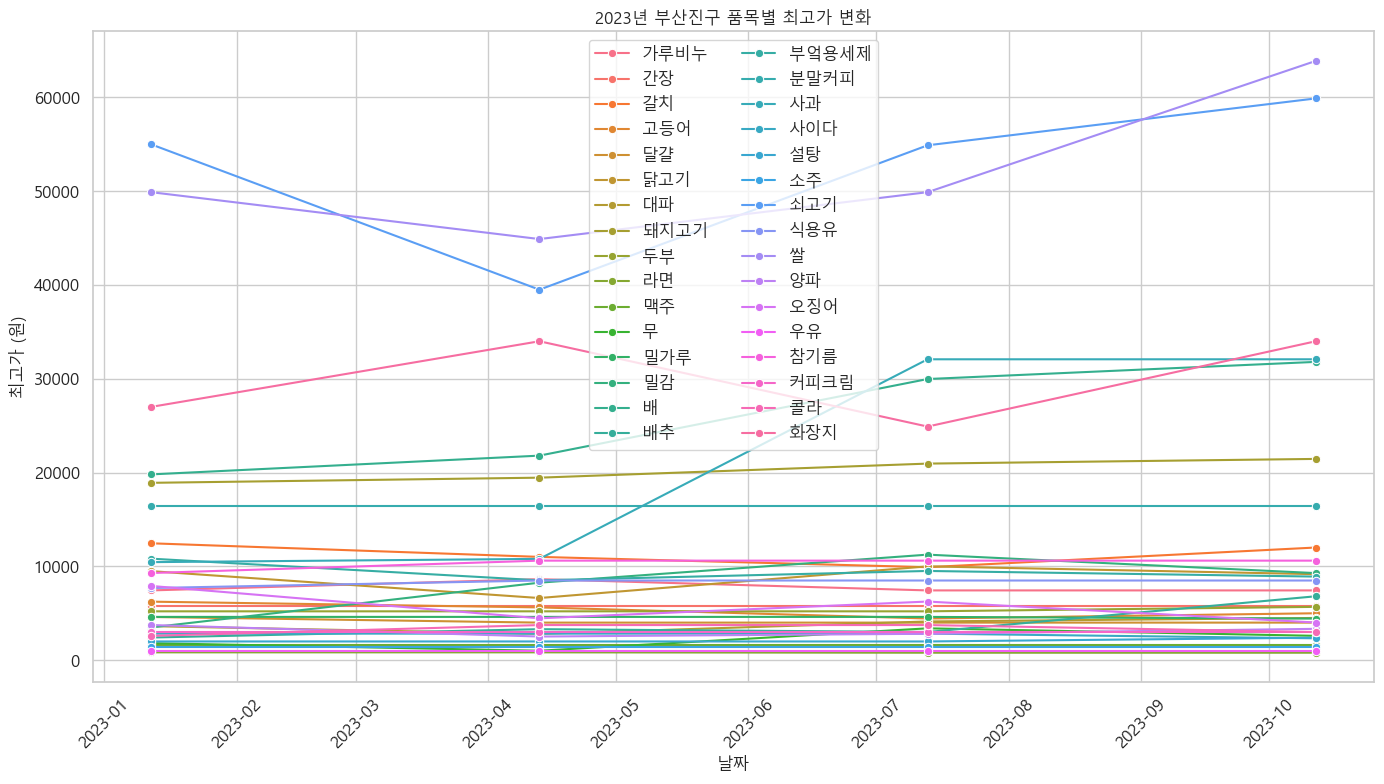

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("부산진구2023_1q.csv")
q2 = pd.read_csv("부산진구2023_2q.csv")
q3 = pd.read_csv("부산진구2023_3q.csv")
q4 = pd.read_csv("부산진구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 부산진구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("부산진구2023_max.csv", index=False, encoding="utf-8-sig")